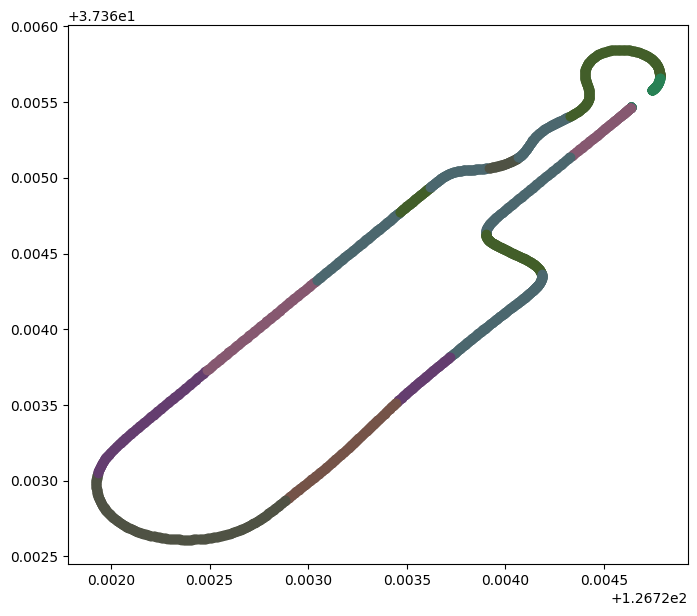

In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import io
import random

gps_df = pd.read_csv("0320GPS_POSITION.csv")
rgb_df = pd.read_csv("clustered/yh_20_stand_clus7.csv")
# rgb_df = pd.read_csv("/home/bg/lstm_autoencoder_trajectory/interpolate/new_rgb_bg_timestep20_standard.csv")
# rgb_df = pd.read_csv("/home/bg/LSTM_Autoencoder_for_AV/rgb_bg_timestep50.csv")

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)


# 길이가 동일한 경우
for i in range(len(rgb_df['r'])):
    ax.scatter(gps_df['longitude'][i], gps_df['latitude'][i], marker='o', color = [rgb_df['r'][i], rgb_df['g'][i], rgb_df['b'][i], 1])

plt.show()


In [17]:
data2 = pd.read_csv("/home/bg/lstm_autoencoder_trajectory/forgraph/new_bg_test.csv")

np.set_printoptions(precision=3, suppress=True)
data2.head()
data2 = data2.T
data2_pd = pd.DataFrame(data2)
data2_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418
brake_pressure,23.60,23.644847,23.690691,23.733440,23.700001,23.69670,23.668065,23.602492,23.616926,23.700001,...,2.489583,3.263358,4.058473,4.150327,4.295771,4.501391,4.804968,5.096670,5.344309,5.683897
long_accel,0.12,0.120000,0.120000,0.109020,0.116588,0.11684,0.111416,0.109751,0.105078,0.122180,...,-0.726319,-0.781248,-0.795847,-0.759766,-0.706644,-0.745839,-0.761187,-0.774504,-0.774949,-0.770000
steering_angle,3.90,3.900000,3.746680,3.909479,3.949352,3.90000,3.900000,3.900000,3.933852,3.920689,...,3.391204,3.300000,3.300000,3.300000,3.300000,3.300000,3.300000,3.300000,3.386585,3.300000
wheel_speed,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,4.633753,4.502871,4.307204,4.161248,4.028905,3.867193,3.688106,3.595831,3.441057,3.312500


In [18]:
data2 = data2_pd 
data2 = data2.T
data2 = data2[["brake_pressure", "steering_angle","long_accel", "wheel_speed"]]


data2.head()

,brake_pressure,steering_angle,long_accel,wheel_speed
0,23.600000,3.900000,0.120000,0.0
1,23.644847,3.900000,0.120000,0.0
2,23.690691,3.746680,0.120000,0.0
3,23.733440,3.909479,0.109020,0.0
4,23.700001,3.949352,0.116588,0.0


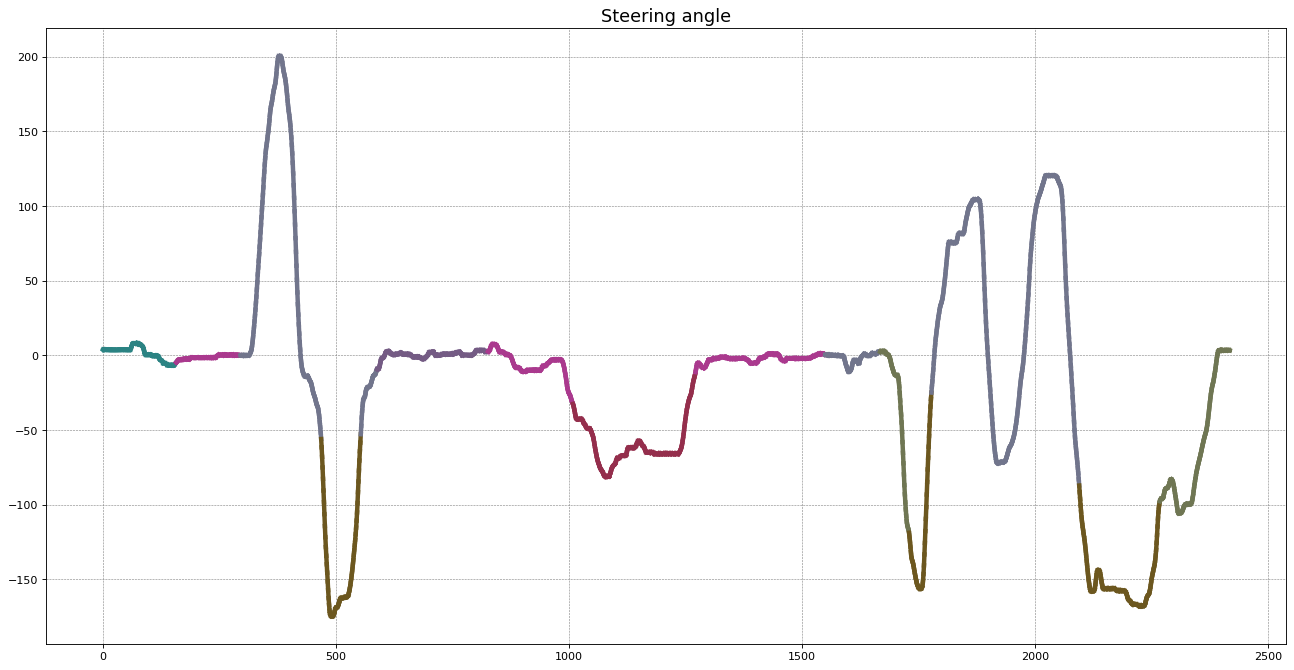

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
data2 = pd.read_csv('/home/bg/lstm_autoencoder_trajectory/forgraph/new_bg_test.csv')
color_data = pd.read_csv('/home/bg/lstm_autoencoder_trajectory/forgraph/20_stand_clus7.csv')

# RGB 값과 그에 해당하는 brake_pressure 데이터를 가져옴
rgb_values = color_data[['r', 'g', 'b']].values
brake_pressure_values = data2['steering_angle'].values

fig, ax = plt.subplots(figsize=(20, 10), dpi=80) 

# 이전 좌표와 색상을 저장하기 위한 변수를 초기화
old_x, old_y = 0, brake_pressure_values[0]
old_color = rgb_values[0]

for i in range(1, len(brake_pressure_values)):
    # 새로운 x, y 좌표와 색상을 얻음
    new_x, new_y = i, brake_pressure_values[i]
    new_color = rgb_values[i]

    # 이전 좌표에서 새로운 좌표까지 선을 그림
    ax.plot([old_x, new_x], [old_y, new_y], color=old_color, linewidth=4)

    # 이전 좌표와 색상을 업데이트함
    old_x, old_y = new_x, new_y
    old_color = new_color

# ax.grid(True)  # 격자 추가
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.title('Steering angle', fontsize=16)
plt.show()


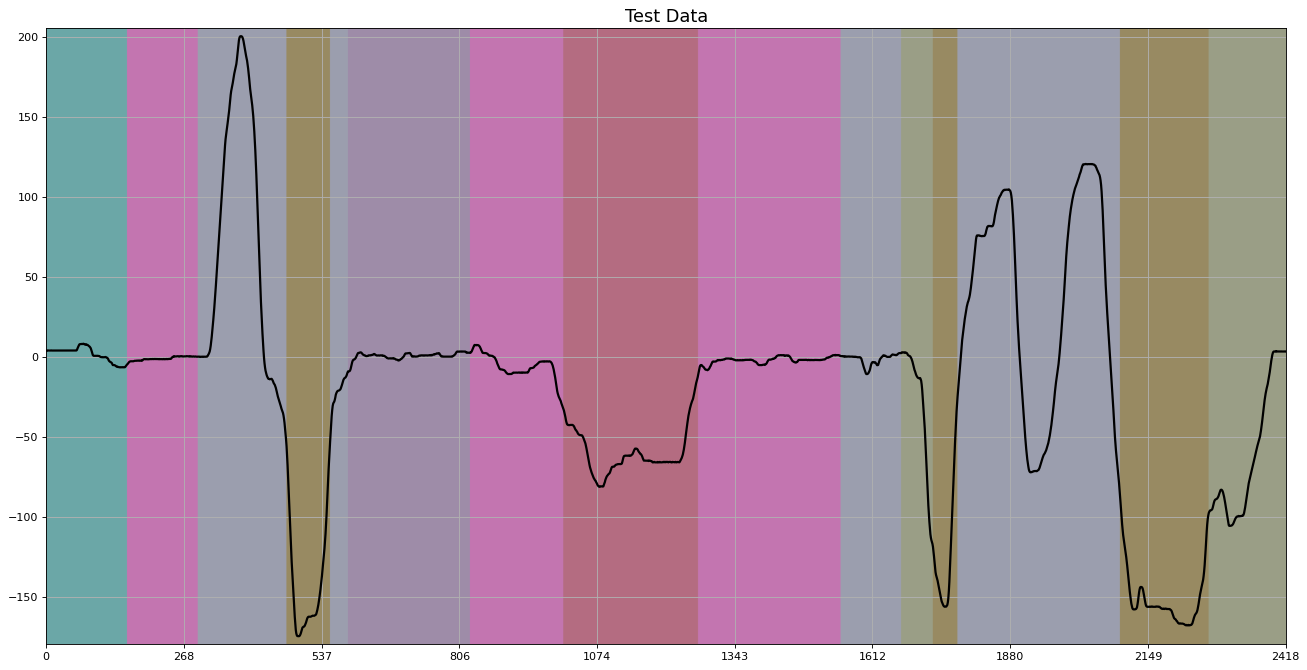

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
data2 = pd.read_csv('/home/bg/lstm_autoencoder_trajectory/forgraph/new_bg_test.csv')
color_data = pd.read_csv('/home/bg/lstm_autoencoder_trajectory/forgraph/20_stand_clus7.csv')

# RGB 값과 그에 해당하는 steering_angle 데이터를 가져dhkkkkk
rgb_values = color_data[['r', 'g', 'b']].values
steering_angle_values = data2['steering_angle'].values


# 알파 채널 (투명도) 추가
rgba_values = np.zeros((rgb_values.shape[0], rgb_values.shape[1] + 1))
rgba_values[:, :3] = rgb_values
rgba_values[:, 3] = 0.7  # 투명도 설정

# steering_angle_values의 최대값과 최소값을 계산
free = 5
min_val, max_val = np.min(steering_angle_values - free), np.max(steering_angle_values + free)

# 그래프의 배경으로 사용할 이미지 만들기
image_height = int(max_val - min_val)
image = np.repeat(rgba_values[np.newaxis, :, :], image_height, axis=0) 

fig, ax = plt.subplots(figsize=(20, 10), dpi=80)

# imshow 를 통해서 이미지를 그림화 해보자
ax.imshow(image, aspect='auto', extent=[0, len(steering_angle_values), min_val, max_val])

ax.plot(steering_angle_values, color='black', linewidth=2)  # 검은색 선으로 그래프 그리기

# x축 눈금 조정
ax.set_xticks(np.linspace(0, len(steering_angle_values)-1, 10))  # 10개 눈금
ax.set_xticklabels(np.linspace(0, len(steering_angle_values)-1, 10).astype(int))  # 눈금의 라벨

ax.grid(True)  # 격자 만들어
plt.title('Test Data', fontsize=16)
plt.show()
